# fundeltaT histogram
## using big M (10^4)

In [3]:
#Import Programs

import random
import numpy
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

In [4]:
#Initialize Constants

num_bins = 200

In [5]:
# Parameters
meandeltaT = numpy.pi
# Using the same num of collisions as used in sample program from Celia
# This yields a better looking histogram 
# Done for comparison
M = 10**4 
J = 300
dTau = 2 * numpy.pi / J

In [6]:
# Copying flatten function 
# Input nested array (arrays within main array)
# Each element of sub-arrays copied into new main array
def flatten(lst):
    new_lst = []
    for i in lst:
        for j in i:
            new_lst.append(j)
    return new_lst

In [7]:
# DeltaT is time between collisions
# in Celia's program - DeltaT is length of eddy turnover
def fundeltaT(num_bins, M, dTau):
    deltaT = []
    
    # Creates rayleigh distribution
    # mode meandeltaT, size M
    rayleigh = numpy.random.rayleigh(meandeltaT, M)
    hist, bin_edges = numpy.histogram(rayleigh, bins = num_bins, density = True)
    cum_values = numpy.zeros(bin_edges.shape)
    cum_values[1:] = numpy.cumsum(hist*numpy.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    
    for i in range(M):
        r = numpy.random.rand(1)
        deltaTtemp = inv_cdf(r)

        if (deltaTtemp % dTau < 0.005):
            deltaTtemp2 = deltaTtemp - (deltaTtemp % dTau)
        else:
            deltaTtemp2 = deltaTtemp + dTau - (deltaTtemp % dTau)
        deltaT.append(deltaTtemp2)
        
    deltaT = flatten(deltaT)
    count, bins, ignored = plt.hist(deltaT, 80, density = True)
    plt.title("Delta T")
    plt.xlabel("Delta T")
    plt.show()
    
    return deltaT

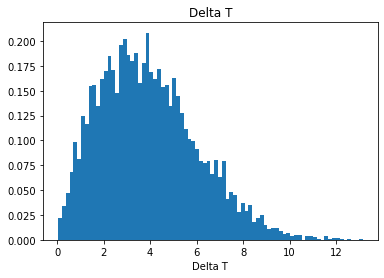

In [8]:
deltaT = fundeltaT(num_bins, M, dTau)